# Review of descriptive statistics
------

Lets review some descriptive statistics. 

#### average / mean

This is simple: represent the mean value.

$$\mu = \frac{1}{N}\sum_i^N a_i$$

In [1]:
import numpy as np
a = [3, 5, 9]
np.mean(a)

assert np.mean(a) == sum(a)/len(a)

print(np.mean(a))

5.666666666666667


In [2]:
np.square(3)

9

In [3]:
mean = 5.666666666666667

np.sqrt((np.square(3 - mean) + np.square(5 - mean) + np.square(9 - mean))/3)

2.494438257849294

#### standard deviation: 

* Discrete random variable: 

$$\sigma = \sqrt{\frac{1}{N} \sum_i^N (x_i - \mu)^2}$$


In [4]:
np.std(a)

2.494438257849294

Standard deviations represents the dispersion. Low standard deviation indicates that the values are close to the mean value. 

<!-- <img src="figs/std.png" style="width: 350px;"> -->

<a title="M. W. Toews, CC BY 2.5 &lt;https://creativecommons.org/licenses/by/2.5&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Standard_deviation_diagram.svg"><img width="256" alt="Standard deviation diagram" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/256px-Standard_deviation_diagram.svg.png"></a>


1 standard deviation width represents 68.2% of all the data distribution. We will see more details in the histogram review and how its relates to histogram width-height and gaussian. The variance is equal to standard deviation squared sometimes descibed as $\sigma^2$.

In [5]:
a = [73, 68, 70, 50, 80, 90]
np.mean(a)

71.83333333333333

In [6]:
np.std(a)

12.19858826076016

In [7]:
np.mean(a) - 2*np.std(a), np.mean(a) + 2*np.std(a) # confidence interval 95CL%

(47.43615681181301, 96.23050985485365)

From the above mass sample: 68% of human mass is between 59.63kg to 84.03kg

#### Mode

The mode is the value that appears most often in a set of data values.

In [8]:
import pandas as pd
a = [1, 1, 1, 3, 4, 5, 6]

pd.Series(a).value_counts()

1    3
3    1
4    1
5    1
6    1
dtype: int64

#### Median

Median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution.

In [9]:
a = [10, 20, 30, 15, 50, 60, 70]

In [10]:
sorted(a)

[10, 15, 20, 30, 50, 60, 70]

In [11]:
np.median(a), np.mean(a)

(30.0, 36.42857142857143)

In [12]:
np.median(a)

30.0

<a title="Cmglee, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Visualisation_mode_median_mean.svg"><img width="256" alt="Visualisation mode median mean" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Visualisation_mode_median_mean.svg/256px-Visualisation_mode_median_mean.svg.png"></a>

#### Root Mean square  (RMS)

Root Mean Square (RMS or rms) is defined as the square root of the mean square (the arithmetic mean of the squares of a set of numbers)


$$
x_{RMS} = \sqrt{\frac{1}{N}\sum_i^N x_i^2} = \sqrt{\frac{1}{N}(x_1^2 + x_2^2 \cdots x_N^2)}
$$


RMS of the pairwise differences of the two data sets can serve as a measure how far on average the error is from 0 (predicted vs measured values).

In [13]:
def rms(a): 
    return np.sqrt(np.square(a).sum()/len(a))

In [14]:
rms(a)

42.46847570341357

#### Examples

In [15]:
import pandas as pd
from statadict import parse_stata_dict

stata_dict = parse_stata_dict('../../ThinkStats2/code/2002FemPreg.dct')

df = pd.read_fwf('../../ThinkStats2/code/2002FemPreg.dat', 
                 names=stata_dict.names, 
                 colspecs=stata_dict.colspecs)

In [16]:
df[:3]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231


Some feature description from ThinkStats2 book: 

* `caseid` is the integer ID of the respondent.

* `prglength` is the integer duration of the pregnancy in weeks.

* `outcome` is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.

* `pregordr` is a pregnancy serial number; for example, the code for a respondent’s first pregnancy is 1, for the second pregnancy is 2, and so on.

* `birthord` is a serial number for live births; the code for a respondent’s first child is 1, and so on. For outcomes other than live births, this field is blank.

* `birthwgt_lb` and `birthwgt_oz` contain the pounds and ounces parts of the birth weight of the baby.

* `agepreg` is the mother’s age at the end of the pregnancy.

* `finalwgt` is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.


In [17]:
import sys
sys.path.append('/Users/Valdir.Salustino@ibm.com/Documents/git/ThinkStats2/code')

from nsfg import CleanFemPreg

# perform some cleanup
CleanFemPreg(df)

In [18]:
POUND_TO_KG = 0.453592

df['totalwgt_kg'] = df['totalwgt_lb']*POUND_TO_KG

In [19]:
print('mean:', df['totalwgt_lb'].mean())
print('std:',  df['totalwgt_lb'].std())
print('median:', df['totalwgt_lb'].median())
print('rms:', rms(df['totalwgt_lb'].dropna().values))
print('mode:', df['totalwgt_lb'].mode().values[0]) 
print()
print('-'*40)
print()
print('mean:', df['totalwgt_kg'].mean())
print('std:',  df['totalwgt_kg'].std())
print('median:', df['totalwgt_kg'].median())
print('rms:', rms(df['totalwgt_kg'].dropna().values))
print('mode:', df['totalwgt_kg'].mode().values[0]) 


mean: 7.265628457623368
std: 1.4082934455690173
median: 7.375
rms: 7.4008396735760025
mode: 7.5

----------------------------------------

mean: 3.2956309433502984
std: 0.6387906405625416
median: 3.345241
rms: 3.356961669216686
mode: 3.4019399999999997


```

value	label	 	        Total
1	LIVE BIRTH              9148
2	INDUCED ABORTION        1862
3	STILLBIRTH               120
4	MISCARRIAGE             1921
5	ECTOPIC PREGNANCY        190
6	CURRENT PREGNANCY        352

```

In [20]:
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [21]:
df[df['caseid'] == 10229].sort_values('datend')['outcome']

11093    4
11094    4
11095    4
11096    4
11097    4
11098    4
11099    1
Name: outcome, dtype: int64

# Correlations: 


#### Covariance: 
Covariance is a measure of the joint variability of two random variables. 


<a title="Cmglee, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Covariance_trends.svg"><img width="128" alt="Covariance trends" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Covariance_trends.svg/128px-Covariance_trends.svg.png"></a>

**Formal definition:**

$$
cov(X,Y) = E[(X - E[X])(Y - E[y])]
$$


[from wiki]: For two jointly distributed real-valued random variables {\displaystyle X}X and {\displaystyle Y}Y with finite second moments, the covariance is defined as the expected value (or mean) of the product of their deviations from their individual expected values



If the (real) random variable pair $(X,Y)$ can take on the values $(x_i, y_i)$ for $i = (1,...,N)$ with equal probabilities $p_i = 1/N$ then the covariance can be equivalently written in terms of the means $E(X)$ and $E(Y)$ as 

$$
cov(X,Y) = \frac{1}{N}\sum_i^N(x_i - E(Y))(y_i - E(Y))
$$


Note: $cov(X,X) = \sigma^2$

In [22]:
X = np.array([1, 2, 3, 4, 5])
Y = 0.3*X
# Y = np.square(X)

In [23]:
X

array([1, 2, 3, 4, 5])

In [24]:
Y

array([0.3, 0.6, 0.9, 1.2, 1.5])

In [25]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Y')

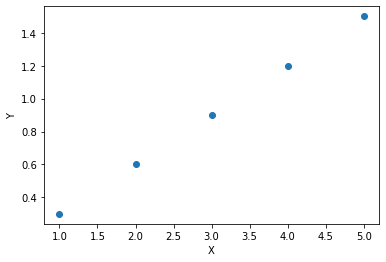

In [26]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

In [27]:
np.cov(X,Y, bias=True)

array([[2.  , 0.6 ],
       [0.6 , 0.18]])

In [28]:
# cov(X*X) cov(X*Y)
# cov(Y*X) cov(Y*Y)

In [29]:
X

array([1, 2, 3, 4, 5])

In [30]:
np.var(X)

2.0

In [31]:
np.sqrt(np.var(X))

1.4142135623730951

In [32]:
np.std(X)

1.4142135623730951

#### Pearson correlation coefficient



[cite: wiki] It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1.


$$
\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X\sigma_Y}
$$


It is a measure of linear correlation between two sets of data.


<a title="Kiatdd, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Correlation_coefficient.png"><img width="512" alt="Correlation coefficient" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/512px-Correlation_coefficient.png"></a>



<a title="DenisBoigelot, original uploader was Imagecreator, CC0, via Wikimedia Commons" href="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png">
    <img width="512" alt="Correlation examples2" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/256px-Correlation_examples2.svg.png"></a>


<a href="https://commons.wikimedia.org/wiki/File:Correlation_examples2.svg">DenisBoigelot, original uploader was Imagecreator</a>, CC0, via Wikimedia Commons


Take a note: correlation is not causality, see <a href="https://www.tylervigen.com/spurious-correlations">here</a>

In [33]:
X

Y = np.sqrt(X)

In [34]:
X

array([1, 2, 3, 4, 5])

In [35]:
Y

array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798])

In [36]:
np.corrcoef(X,Y)

array([[1.        , 0.99353344],
       [0.99353344, 1.        ]])

# Probabilities

In [63]:
a = ['A', 'A', 'B', 'B','B','B','B']

In [202]:
p_theory = 2/7
p_theory

0.2857142857142857

In [64]:
import random

In [209]:
random.choice(a)

'B'

In [297]:
probabilities = []


for i in range(100): 
    values = []
    for j in range(10):

        extracted = random.choice(a)

        if extracted == 'A': 
            values.append('correct')
        else: 
            values.append('fail')

    num = len([i for i in values if i == 'correct'])
    den = len(values)

    probabilities.append(num/den)

In [298]:
len(probabilities)

100

(array([ 5.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0.,  0., 23.,  0.,  0.,
         0.,  0., 25.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0.,  0.,  9.,
         0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

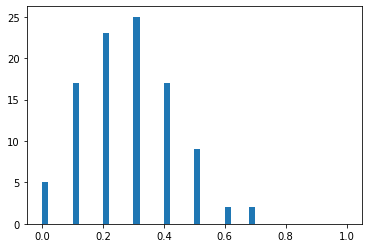

In [299]:
plt.hist(probabilities, bins=50, range=(0,1))

* standard error: 

$$
E_{e} = \frac{\sigma}{\sqrt{N}}
$$

In [273]:
np.mean(probabilities), np.std(probabilities), np.std(probabilities)/np.sqrt(len(probabilities))

(0.285732, 0.014121868714869139, 0.00014121868714869138)

In [ ]:
0.285732 +/- 0.000141

<ErrorbarContainer object of 3 artists>

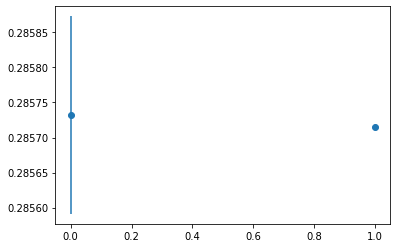

In [290]:
# import matplotlib.lines as mlines


plt.errorbar([0,1], [0.285732, 2/7], yerr=[0.000141, 0], xerr=None, marker='o', linestyle='')
# plt.plot(-0.04, 2/7, 0.04, 2/7, color='k')

# mlines.Line2D([-0.04,0.04], [2/7,2/7])

In [274]:
2/7

0.2857142857142857

In [254]:
np.mean(probabilities) - np.std(probabilities), np.mean(probabilities) + np.std(probabilities)

(0.14193409345181932, 0.42738590654818065)

$$
P = N_A/ N_T
$$

In [155]:
2/7 + 5/7

1.0

In [154]:
0.2857142857142857 + 0.7142857142857143

1.0

In [157]:
2/7*5/7

0.2040816326530612

# Distributions 

## Histograms

In [171]:
a = [5, 6, 3, 4, 4, 4, 6, 6]

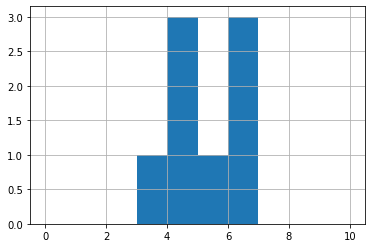

In [179]:
_ = plt.hist(a, bins=10, range=(0,10))
plt.grid()

In [180]:
(10 - 0)/10

1.0

In [183]:
df['agepreg'].min(), df['agepreg'].max()

(10.33, 44.08)

<AxesSubplot:>

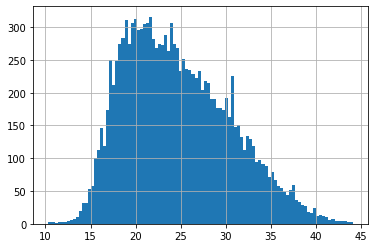

In [184]:
df['agepreg'].hist(bins=100, range=(df['agepreg'].min(), df['agepreg'].max()))

In [185]:
df['agepreg'].mean()

24.6881511970395

In [186]:
df['agepreg'].median()

23.91

In [187]:
df['agepreg'].mode()

0    22.75
dtype: float64

In [188]:
df['agepreg'].std()

5.814707994302967

In [190]:
df['agepreg'].mean() - 2*df['agepreg'].std(), df['agepreg'].mean() + 2*df['agepreg'].std()

(13.058735208433564, 36.31756718564543)

# Hypothesis tests

Lets first revisit what statistical tests are reference [here](http://www.stats.ox.ac.uk/~filippi/Teaching/psychology_humanscience_2015/lecture8.pdf)



In [303]:
from numpy import random

In [306]:
obs = random.normal(0, 1, 1000)

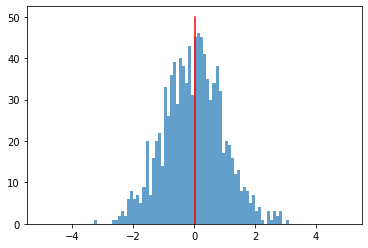

In [363]:
hull_hypothesis = 0.05
fig = plt.figure()
ax = fig.add_subplot(111)

_ = ax.hist(obs, range=(-5,5), bins=100, alpha=0.7)

ax.add_line(mlines.Line2D([hypo_alter,hypo_alter], [0, 50], color='r'))
# largura a meia altura ~ \sigma

In [364]:
from scipy import stats

In [365]:
stats.ttest_1samp(obs, hull_hypothesis)

Ttest_1sampResult(statistic=-2.4278970183210133, pvalue=0.015362419607646415)

* pvalues < 5% alternative hypothesis cannot be excluded
* pvalue > 5% null hypothesis cannot be excluded

- hull hypotheses: first babies have average birth lenght of 40 weeks;
- alternative hypothesis: first babies have average birth higher from 40 weeks;

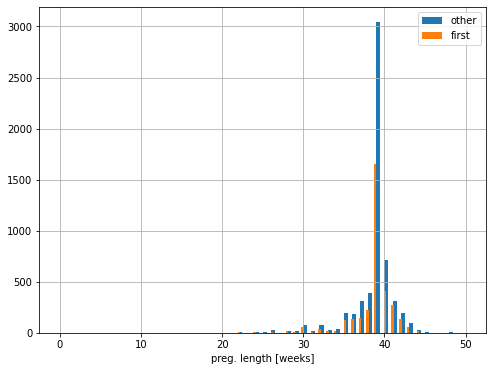

In [374]:
first = (df['pregordr'] == 1) & (df['outcome'] == 1)
other = (df['pregordr'] != 1) & (df['outcome'] == 1)

# observe pandas have histogram plotting
plt.figure(figsize=(8,6))

df[other]['prglngth'].hist(bins=100, label='other', density=False)
df[first]['prglngth'].hist(bins=100, label='first', density=False)

plt.xlabel('preg. length [weeks]')
plt.legend()

In [372]:
df[first]['prglngth'].mean(), df[first]['prglngth'].mean() 

(38.58432304038005, 2.681047688536467)

In [373]:
df[other]['prglngth'].mean(), df[other]['prglngth'].std()

(38.54671280276817, 2.71481128288008)

In [382]:
err_first = df[first]['prglngth'].std()/np.sqrt(len(df[first]['prglngth']))
err_other = df[other]['prglngth'].std()/np.sqrt(len(df[other]['prglngth']))

In [386]:
df[other].shape[0], df[first].shape[0]

(5780, 3368)

In [384]:
err_first, err_other

(0.046197502490972646, 0.035708838674136885)

<ErrorbarContainer object of 3 artists>

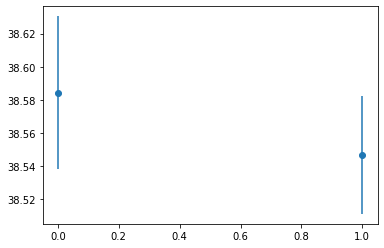

In [387]:
plt.errorbar([0,1], [df[first]['prglngth'].mean(), df[other]['prglngth'].mean()], yerr=[err_first, err_other], xerr=None, marker='o', linestyle='')

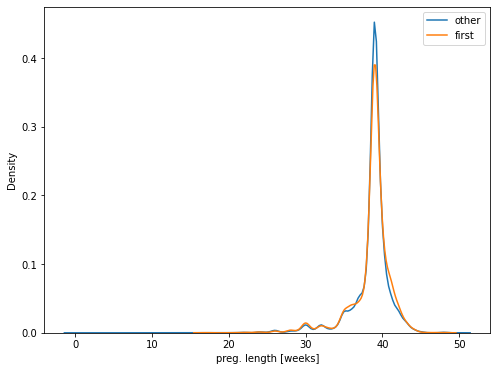

In [175]:
import seaborn as sns
plt.figure(figsize=(8,6))

sns.kdeplot(data=df[other], x="prglngth", label='other')
sns.kdeplot(data=df[first], x="prglngth", label='first')

plt.xlabel('preg. length [weeks]')
plt.legend()

In [379]:
scipy.stats.ttest_1samp(df[other]['prglngth'].values, 40)

Ttest_1sampResult(statistic=-40.698248702341985, pvalue=0.0)

In [380]:
scipy.stats.ttest_1samp(df[first]['prglngth'].values, 40)

Ttest_1sampResult(statistic=-30.644015007014403, pvalue=4.0666236645525976e-182)

- $H_0$ first babies have equal pregnance length that of others babies
- $H_1$ first babies have different pregnance length that of others babies

In [388]:
stats.ttest_ind(df[first]['prglngth'].values, df[other]['prglngth'].values)

Ttest_indResult(statistic=0.6420049882591117, pvalue=0.5208860344743724)

 - the null hypothesis cannot be rejected.

- H_0 first babies does not have higher pregnance lenght that of other babies; 
- H_1 first babies have higher pregnance length that of other babies; 

Please read as ref [this](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)